In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


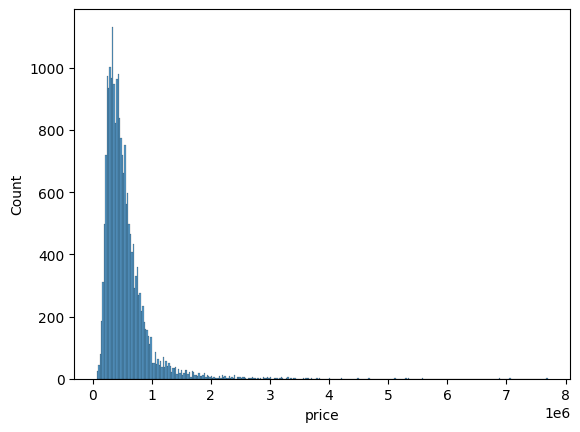

<Figure size 640x480 with 0 Axes>

In [3]:
sns.histplot(df['price'])
fig = plt.figure()

In [4]:
df_log = np.log(df['price'])

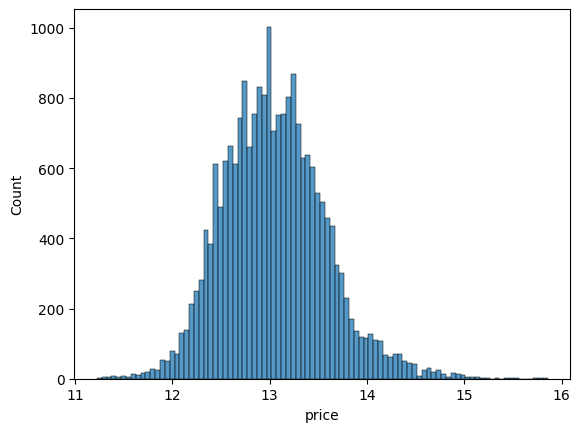

<Figure size 640x480 with 0 Axes>

In [5]:
sns.histplot(df_log)
fig = plt.figure()

In [8]:
df['price'].head(20)

0      221900.0
1      538000.0
2      180000.0
3      604000.0
4      510000.0
5     1225000.0
6      257500.0
7      291850.0
8      229500.0
9      323000.0
10     662500.0
11     468000.0
12     310000.0
13     400000.0
14     530000.0
15     650000.0
16     395000.0
17     485000.0
18     189000.0
19     230000.0
Name: price, dtype: float64

In [10]:
df_log.head(20)

0     12.309982
1     13.195614
2     12.100712
3     13.311329
4     13.142166
5     14.018451
6     12.458775
7     12.583995
8     12.343658
9     12.685408
10    13.403776
11    13.056224
12    12.644328
13    12.899220
14    13.180632
15    13.384728
16    12.886641
17    13.091904
18    12.149502
19    12.345835
Name: price, dtype: float64

In [6]:
df_cbrt = np.cbrt(df['price'])

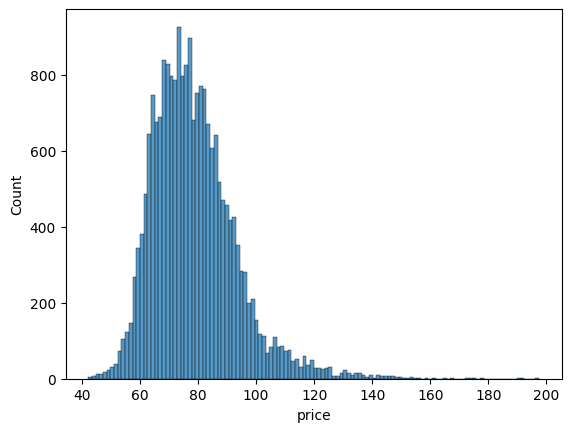

<Figure size 640x480 with 0 Axes>

In [7]:
sns.histplot(df_cbrt)
fig = plt.figure()

In [11]:
from sklearn.preprocessing import PowerTransformer

In [12]:
data = df['price'].values.reshape(-1, 1)

In [13]:
pt = PowerTransformer(method='box-cox')
df_boxcox = pt.fit_transform(data)

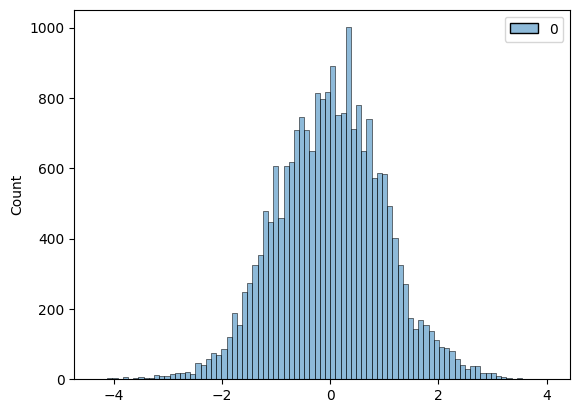

<Figure size 640x480 with 0 Axes>

In [14]:
sns.histplot(df_boxcox)
fig = plt.figure()

In [15]:
df_boxcox

array([[-1.48756258],
       [ 0.34105528],
       [-1.97788547],
       ...,
       [-0.2188212 ],
       [-0.22924854],
       [-0.65300411]])

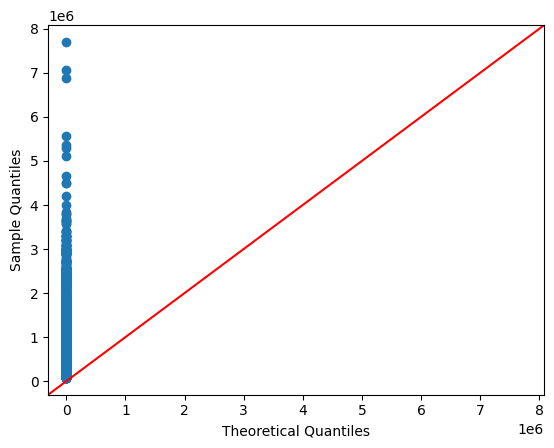

In [17]:
# вихідні дані
df = np.int64(df['price'])
fig = sm.qqplot(df, line='45')
plt.show()

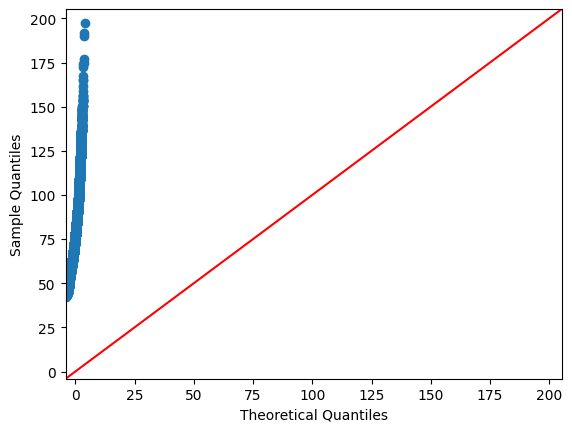

In [18]:
# перетворення кубічним коренем
fig = sm.qqplot(df_cbrt, line='45')
plt.show()

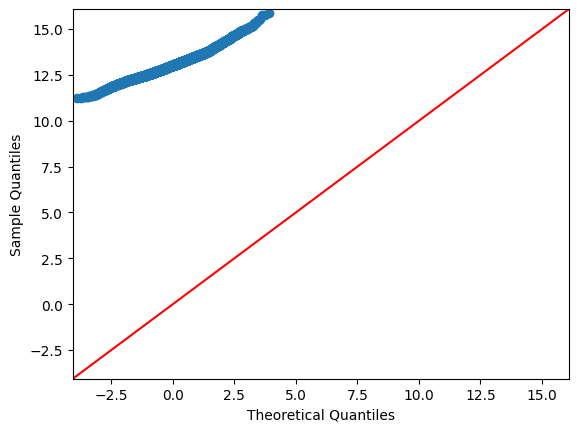

In [19]:
# логарифмічне перетворення
fig = sm.qqplot(df_log, line='45')
plt.show()

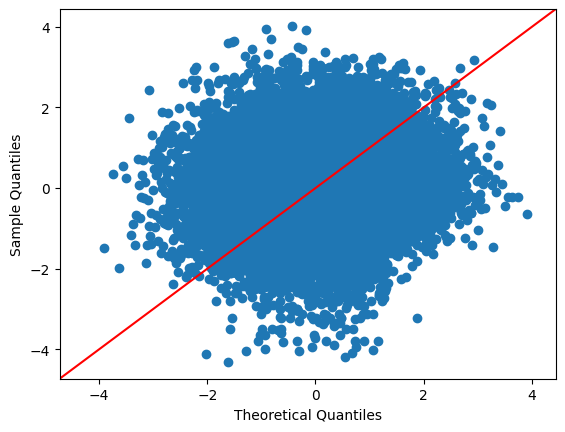

In [20]:
# перетворення Бокса-Кокса
fig = sm.qqplot(df_boxcox, line='45')
plt.show()